# Loss Analysis

In [54]:
import pandas as pd
from scipy.stats import spearmanr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_parquet('fixtypes.parquet')
for i in df.columns: print(f"[{i}]", end = ", ")

[Row ID], [Order ID], [Order Date], [Ship Date], [Ship Mode], [Customer ID], [Customer Name], [Segment], [Country], [City], [State], [Postal Code], [Region], [Product ID], [Category], [Sub-Category], [Product Name], [Sales], [Quantity], [Discount], [Profit], 

## What is point of Discount?

The purpose of discount that make loss
- Loss Leader Strategy
- Urgent Clearance
- Market Penetration

from data it can analysis Loss Leader Strategy

## Loss Leader Strategy

Using a loss leader strategy, a store sells a discounted product at a loss to lure customers in, hoping they will also buy additional that allowing the store to make profit

### Chain of Thought
- when customer get the product that make loss it should lure the customer for buying more product for making profit to the store
- determine in graph between number of order of customer after buy products that make loss from discount and sum of profit from each customer should be Positive Correlation

### Analytical Approach
**hypothesis:** when sell an heavy discount product the strategic expectation is that the profit from this customer's subsequent purchases will leading to a profitable long-term relationship

analyzed the data to visualize the relationship between two key
**X-axis: Total Number of Orders of each customer**
**Y-axis: Total Net Profit of each customer**
using Spearman's rank correlation to find correlation between key then finding average of `Rho` for determine the overall correlation

### Expected Outcome
if the hypothesis is correct, the resulting should be positive corelation


### data preparation

Let the qualifying records be purchases of products sold at a discount so deep that they incur a loss. We then accumulate the profits earned from each customer over their subsequent orders

In [56]:
customers = dict()

#sorted data from Order date
sorted_data = df.sort_values("Order Date")

for idx,row in sorted_data.iterrows():
    id, profit = row["Customer ID"], row["Profit"]

    if id not in customers and profit < 0:
        customers[id] = [profit]
        continue
    
    if id in customers:
        customers[id].append(customers[id][len(customers[id])-1] + profit)

print(customers)
    

{'PO-19195': [-64.7748, -70.2618, -17.771799999999992, -10.686399999999992, 9.141200000000008, -84.33119999999998, -82.77099999999999, -79.55239999999999, -53.97259999999999], 'VS-21820': [-53.7096, -71.9621, -84.97730000000001, -248.554, -242.602, -231.7236, -256.386, -262.8093], 'MM-17920': [-2.5212, 10.5716, 16.9844, 55.440400000000004, -317.8644, -317.058, -308.7042, -296.926, 17.132600000000025, 121.88540000000002, 129.98000000000002, 136.44500000000002, 135.01700000000002, 146.47700000000003, 156.87060000000002, 82.12500000000003], 'BS-11590': [-53.2856, -57.8552, -60.144800000000004, -76.8296, -13.8416, 97.4608, 198.8548, 200.9523, 213.3103, 381.7807], 'DL-13315': [-31.05, -44.681200000000004, -59.452000000000005, -50.64320000000001, -46.528400000000005, -37.811600000000006, -29.478800000000007, -6.9164000000000065, 155.9476, 174.60999999999999, 198.5563, 206.8555, 216.1867, 216.1867, 250.1255], 'TS-21340': [-23.716, -4.093600000000002, 32.599399999999996, -287.9976, -284.984799

### Spearman's Rank Correlation

In [57]:
spearman = dict()

for id in customers:
    if len(customers[id]) <= 2 : continue #avoid data set that can't finding rho, p_values

    x = [i for i in range(1, len(customers[id])+1)]
    rho, p_value = spearmanr(x, customers[id])
    if rho == np.nan : print(1)

    spearman[id] = {"rho":rho,
                    "p_value":p_value}

sp_df = pd.DataFrame.from_dict(spearman, orient='index')
sp_df.index.name = 'customer_id'
    

### Data select criteria

#### form spearman's correlation
data is statistically significant when P-value < 0.05, so I'll choose only p_value < 0.05

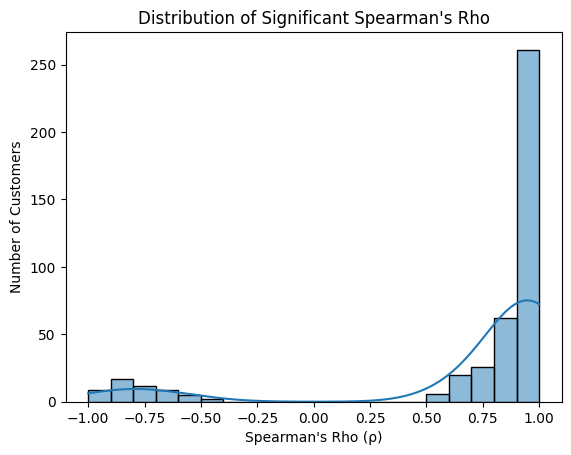

In [58]:
significant_cor = sp_df.query("p_value < 0.05")

sns.histplot(significant_cor['rho'], bins=20, kde=True)
plt.title('Distribution of Significant Spearman\'s Rho')
plt.xlabel('Spearman\'s Rho (ρ)')
plt.ylabel('Number of Customers')
plt.show()

from Distribution of Significant Spearman's Rho can determine overall correlation is positive

In [59]:
mean_rho = significant_cor['rho'].mean()
median_rho = significant_cor['rho'].median()

print(f"Average significant Rho: {mean_rho:.2f}")
print(f"Median significant Rho: {median_rho:.2f}")

Average significant Rho: 0.71
Median significant Rho: 0.96


from Average significant Rho and Median is more than 0 then i can assume as correlation is positive **it can be concluded that Loss Leader Strategy is worked**

## Net Profit from loss Leader Strategy

In [60]:
total = 0
for id in customers:
    total += customers[id][len(customers[id])-1]
print(total)

89158.37490000005
